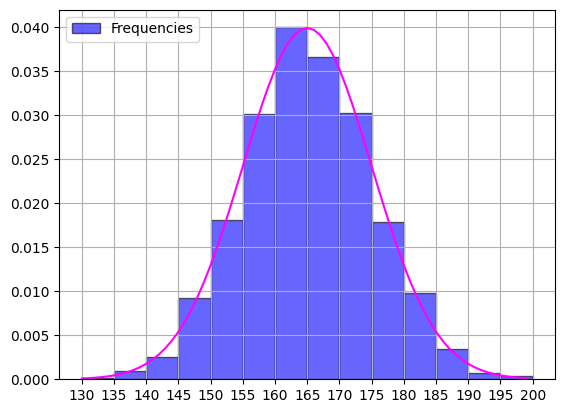

In [16]:
from PIL.ImageOps import scale
from scipy.stats import norm, bernoulli
from matplotlib.pyplot import show, hist, grid, legend, xticks, plot

def generate_heights(m, s, n):
    return norm.rvs(size=n, loc = m, scale=s)

data = generate_heights(165, 10, 5000)
hist(data, bins = 14, density=True, range = (130, 200), color = 'blue', edgecolor = 'black', alpha = 0.6, label = 'Frequencies')

x = range(130,200)
plot(x, norm.pdf(x, loc = 165, scale = 10), color = 'magenta')

xticks(range(130,201, 5))
legend(loc = 'upper left')
grid()
show()

In [19]:
from numpy import mean, std, linspace
def mean_std(n):
    # Medie
    current_data = generate_heights(165, 10, n)
    print('Medie:')
    print(' *simulari:', end='')
    print(mean(current_data))
    print(' *exacta: 165')
    print()
    
    print('Deviatie standard:')
    print(' *simulari: ', end='')
    print(std(current_data))
    print(' *exacta: 10')
    print()
    
    print('Proportie interval [160-170]:')
    print(' *simulari:', end='')
    print(sum([160 <= height <= 170 for height in current_data]) / n)
    print(' *exacta:', end='')
    print(norm.cdf(170, loc=165, scale=10) - norm.cdf(160, loc=165, scale=10))

mean_std(5000)
    
    

Medie:
 *simulari:164.93644876215373
 *exacta: 165

Deviatie standard:
 *simulari: 10.020148910663202
 *exacta: 10

Proportie interval [160-170]:
 *simulari:0.3936
 *exacta:0.38292492254802624


In [35]:
from scipy.stats import expon, uniform, bernoulli
from numpy import mean, std, multiply

def simulated_printing_times(n):
    used_printers = bernoulli.rvs(p = 0.4, size = n)
    # 1 if I1 is used
    # 0 if I2 is used
    alpha = 1/5
    printing_times = [printer * expon.rvs(scale=1/alpha) + (1 - printer) * uniform.rvs(loc=4, scale=2) for printer in used_printers]
    return printing_times

def estimated_values():
    times = simulated_printing_times(10000)
    print(mean(times))
    print(std(times))
    
    # time less than 5
    # estimated
    print(len([time for time in times if time < 5])/len(times))
    
    # theoretical
    print(0.4 * expon.cdf(5, scale=5) + 0.6 * uniform.cdf(5, loc=4, scale=2))
    

estimated_values()

5.029014260210203
3.3701695069311572
0.5564
0.552848223531423


In [42]:
from scipy.stats import uniform
from numpy import exp, mean
from scipy.integrate import quad

def estimated_value(a, b):    
    U = uniform.rvs(loc = a, scale = b-a, size = 10000)
    g = lambda x: exp(-x**2)
    X = [g(u) for u in U]
    print(mean(X) * (b - a))

def computed_value(a, b):
    g = lambda x: exp(-x**2)
    print(quad(g, a, b)[0])

estimated_value(-1, 3)
computed_value(-1, 3)

1.6229004931714845
1.6330314810719482
